<a href="https://colab.research.google.com/github/singhabhinay505/Hotel-Booking-Analysis-AlmaBetter--Capstone-Project.ipynb/blob/main/Copy_of_Hotel_Booking_Analysis_AlmaBetter_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use("fivethirtyeight")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/EDA capstone project/Copy of Hotel Bookings.csv')



In [6]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Various colums in this dataset.

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df = data.copy()

In [10]:
df.index

RangeIndex(start=0, stop=119390, step=1)

# Data type of each column.

In [11]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Analysing if any column contains any null value.

In [12]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

# Assigning data to corresponding null values.

In [13]:
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [14]:
df['country'].fillna(data.country.mode().to_string(), inplace=True)
df['children'].fillna(round(data.children.mean()), inplace=True)

In [15]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [16]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

## Which country has most number of passengers?(Top 5)

In [17]:
df["country"].value_counts()[:5]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

## The avarage of nights staying.

In [18]:
df['all_night']= df.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
m = df['all_night'].mean()
np.round(m,2)

3.43

### Repeated Customer Count

In [19]:
df["is_repeated_guest"].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

## Defining a function to get count.

In [20]:
def get_count(series, limit=None):
  if limit != None:
        series = series.value_counts()[:limit]
  else:
        series = series.value_counts()
  x = series.index
  y = series/series.sum()*100
  return x.values,y.values

In [21]:
df["kids"]=df["children"]+ df["babies"]


In [22]:
df_not_canceled = df[df["is_canceled"]==0]

In [23]:
# How many bookings were canceled:
total_number_of_cancelede_bookings = df["is_canceled"].value_counts()
print(f"Total number of canceled bookings is:{total_number_of_cancelede_bookings[0]}")

Total number of canceled bookings is:75166


# Analysing data from Hotel Booking data.

No handles with labels found to put in legend.


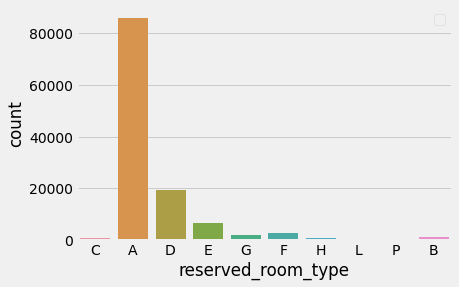

In [24]:
sns.countplot(x="reserved_room_type",data = df)
plt.legend(loc = "upper right")
plt.show()

##Co-relation between every columns with numerical values.

In [25]:
df["num_customers"] = df.apply(lambda x: x['adults'] + x['children'] + x['babies'], axis=1)
df["num_customers"].value_counts()

2     82051
1     22581
3     10495
4      3929
0       180
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: num_customers, dtype: int64

In [26]:
num_df_subdata = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','all_night','num_customers']]


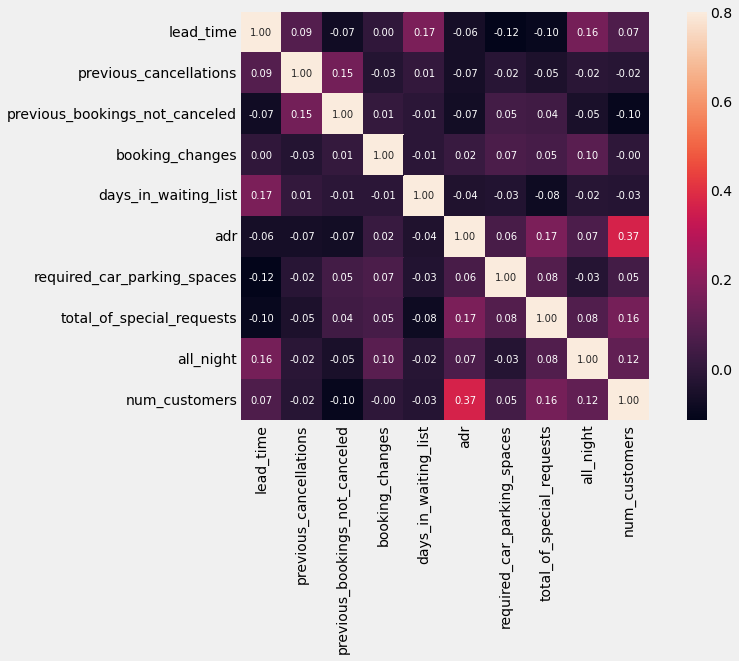

In [27]:
corrmat = num_df_subdata.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

## What is the booking ratio between Resort Hotel and City Hotel?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


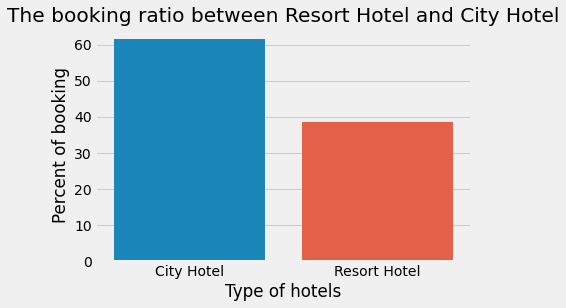

In [28]:
hotel_type,pct_hotel_type = get_count(df_not_canceled['hotel'])
sns.barplot(hotel_type,pct_hotel_type)
plt.title("The booking ratio between Resort Hotel and City Hotel")
plt.xlabel("Type of hotels")
plt.ylabel("Percent of booking")
plt.show()

In [29]:
hotel_type,pct_hotel_type

(array(['City Hotel', 'Resort Hotel'], dtype=object),
 array([61.50121065, 38.49878935]))

From above analysis:
* The percentage of booking in City hotel is above 61.5%.
* The percentage of booking in Resort hotel is  38.5%.




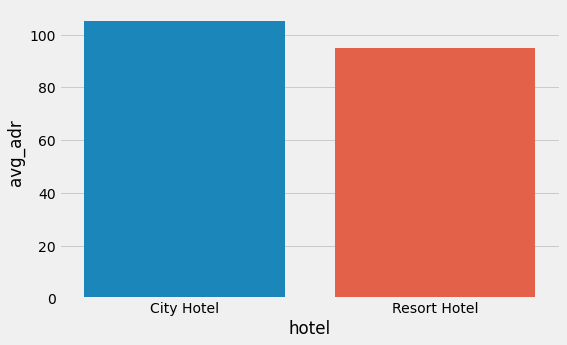

In [30]:
groupby_hotel = df.groupby("hotel")
avg_adr = groupby_hotel["adr"].agg(np.mean).reset_index().rename(columns = {"adr":"avg_adr"})
plt.figure(figsize = (8,5))
sns.barplot(x= avg_adr["hotel"],y = avg_adr["avg_adr"])
plt.show()

* As the booking in City hotel is higher than the resort hotel and average adr of City hotel is high so City hotels are generating more revenue than resort hotel.

## Top ten countries from which the booking has been done.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


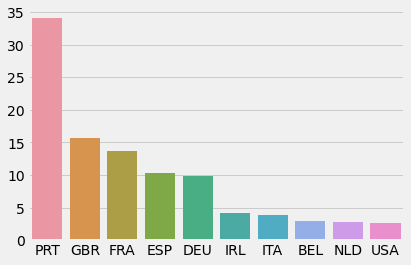

In [31]:
country_name,pct_of_country = get_count(df_not_canceled["country"],limit = 10)
sns.barplot(country_name,pct_of_country)
plt.show()

* Most number of bookings are done from the country code of PRT 
* Secong most number of bookings are done from the country code of GBR followed by FRA, ESP, DEU.

# Hotel-wise booking in various years.

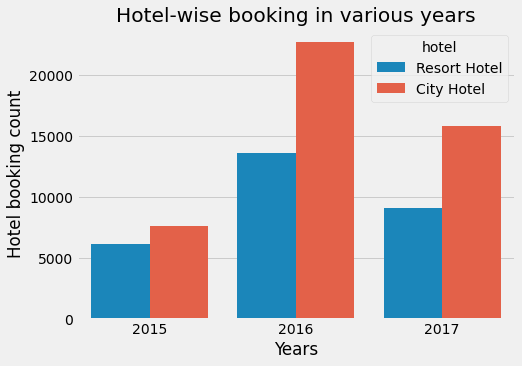

In [32]:

plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);
plt.title("Hotel-wise booking in various years")
plt.xlabel("Years")
plt.ylabel("Hotel booking count")
plt.show()

* Most number of bookings were done in 2016.

### Percentage of hotel booking each year.

##  Which month of the year the hotel is booked most?

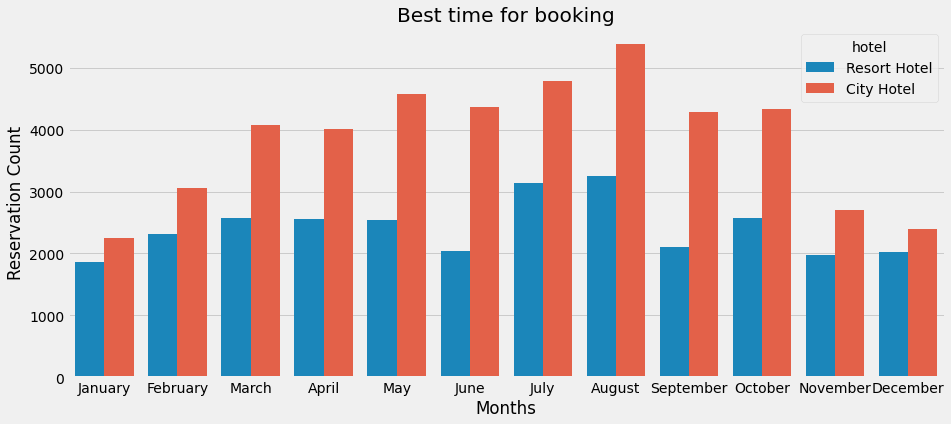

In [33]:
plt.figure(figsize=(14,6))
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

sns.countplot(data=df_not_canceled ,x='arrival_date_month', order = month_order,hue = "hotel")
              

plt.title('Best time for booking')
plt.xlabel('Months')
plt.ylabel('Reservation Count')
plt.show()

* Hotel is booked mostly in August month followed by July,May.
* Least number of bookings were done in January and December.

## Optimal time of year to get best rate

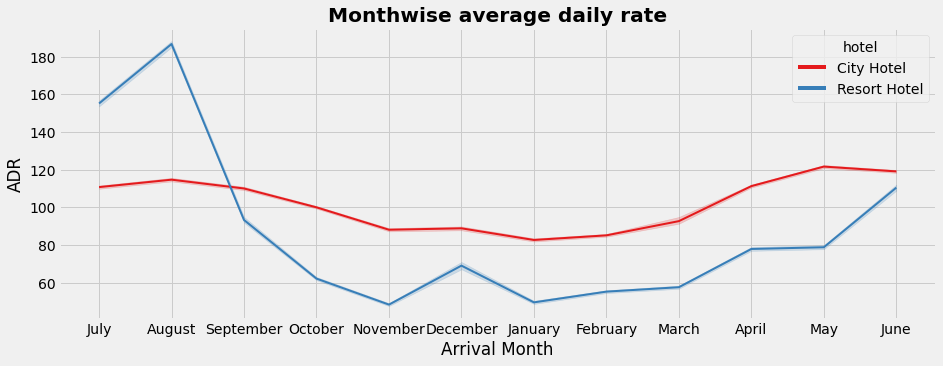

In [34]:
plt.figure(figsize=(14,5))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1',linewidth = 2)

plt.title("Monthwise average daily rate", weight = 'bold')
plt.xlabel("Arrival Month")
plt.ylabel("ADR")
plt.show()

* The ADR is high in July and August. This can be concluded, as the demand is high in those months as seen in the previous chart so the ADR is high.
* Those are the months of summer and customers prefer City hotels than Resort Hotels.
* ADR for city hotel is almost same for every months but quiet low in December and January.

## On which month cancellation rate is high.

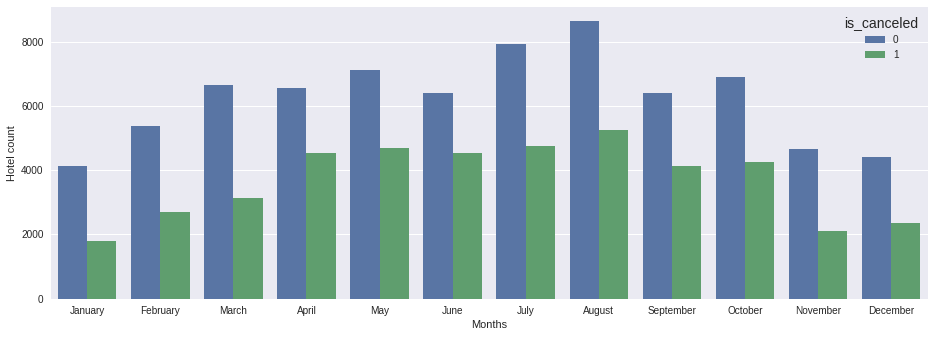

In [35]:
plt.style.use("seaborn")
plt.figure(figsize = (14,5))
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

sns.countplot(x="arrival_date_month",order = month_order, hue = "is_canceled",data = df)
plt.xlabel("Months")
plt.ylabel("Hotel count")
plt.show()

In [36]:
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

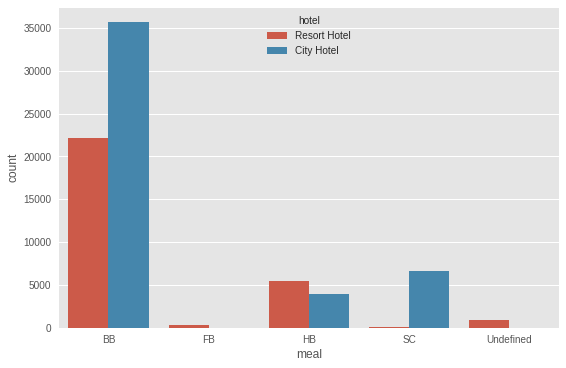

In [37]:
plt.style.use("ggplot")
sns.countplot(x="meal",hue = 'hotel',data = df_not_canceled)
plt.show()

* Most of the people prefers BB type meals.

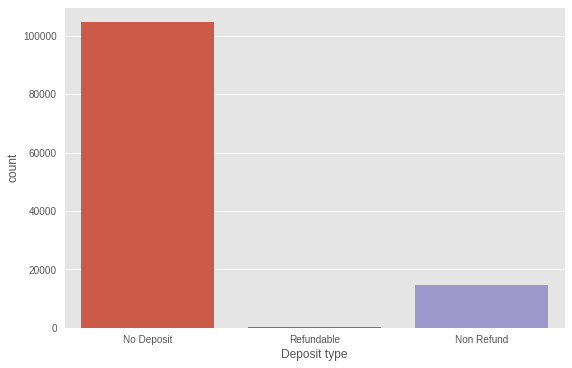

In [38]:
sns.countplot(x="deposit_type",data = df)
plt.xlabel("Deposit type")
plt.show()

* Number of deposite is higher than other options.

In [39]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

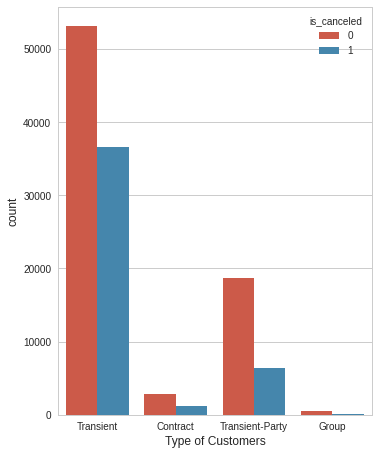

In [40]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (5,7))
sns.countplot(x="customer_type",hue = "is_canceled",data=df)
plt.xlabel("Type of Customers")
plt.show()

* Most of the customers are Transient type.
* Most number of cancellation were done also in Transient type.

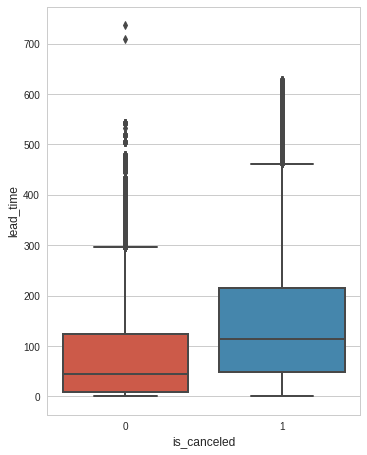

In [41]:
plt.figure(figsize=(5,7))
sns.boxplot(x="is_canceled",y="lead_time",data = df,linewidth = 2)
plt.show()

* In case of cancelled request, the most of the lead time is greater than 100 days.
* There is some exceptional outliers in case of cancelled requests.

## Customer Type analysis

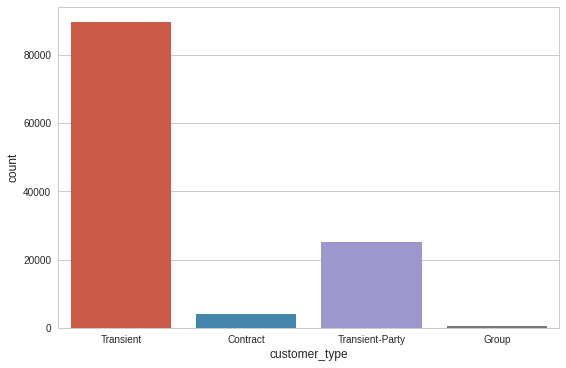

In [42]:
sns.countplot(x = "customer_type",data = df)

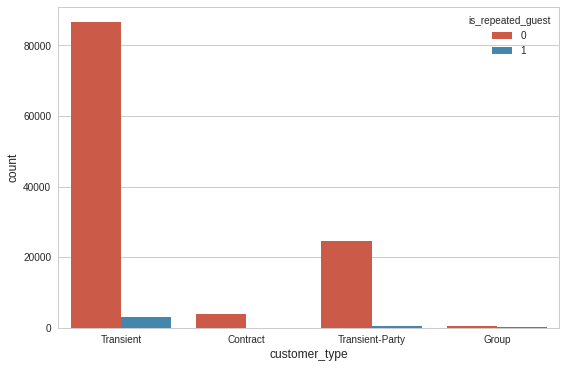

In [43]:
sns.countplot(x = "customer_type",hue = "is_repeated_guest",data = df)

### Hotel wise distribution

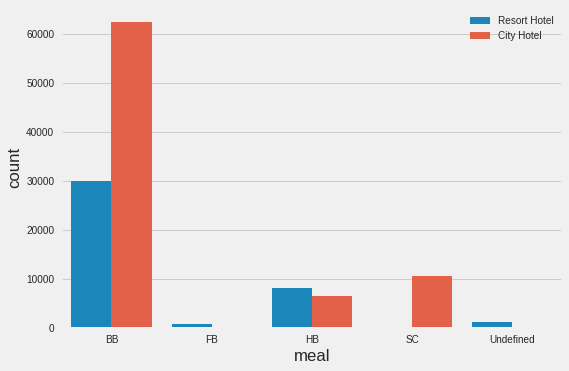

In [44]:
plt.style.use("fivethirtyeight")
meal_count,pct_meal_count = get_count(df["meal"])
sns.countplot(x = "meal",hue = "hotel",data = df)
plt.legend(loc ="upper right")
plt.show()

### Chanel wise distribution

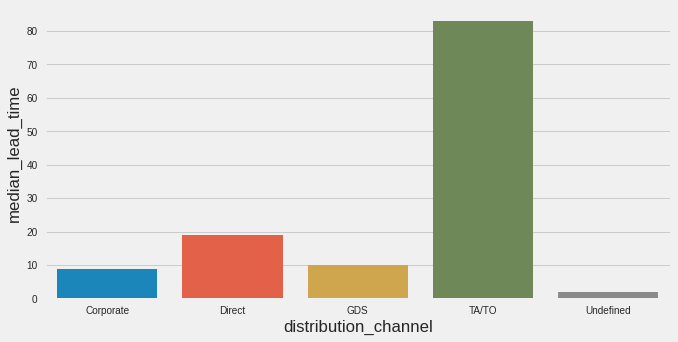

In [45]:
plt.figure(figsize=(10,5))
groupby_dc = df.groupby("distribution_channel")
median_lead_time = groupby_dc["lead_time"].median().reset_index().rename(columns = {"lead_time":"median_lead_time"})
sns.barplot(x = median_lead_time["distribution_channel"],y = median_lead_time["median_lead_time"])
plt.show()

* Lead time is high for travel agencies or travel operators.

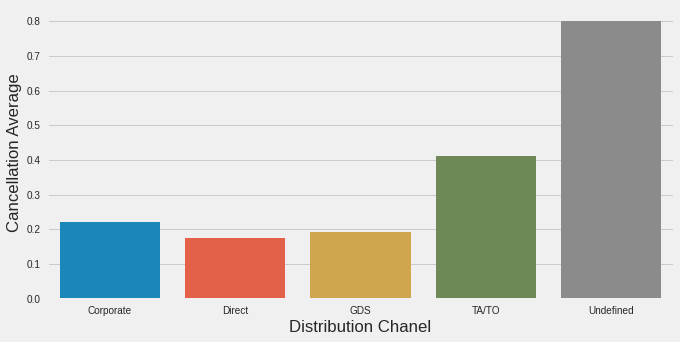

In [46]:
plt.figure(figsize=(10,5))
avg_cancelation_count = groupby_dc["is_canceled"].mean().reset_index().rename(columns = {"is_canceled":"avg_cancel"})
sns.barplot(x = avg_cancelation_count["distribution_channel"],y = avg_cancelation_count["avg_cancel"])
plt.xlabel("Distribution Chanel")
plt.ylabel("Cancellation Average")
plt.show()

* For undefined booking chanel the cancellation is high.

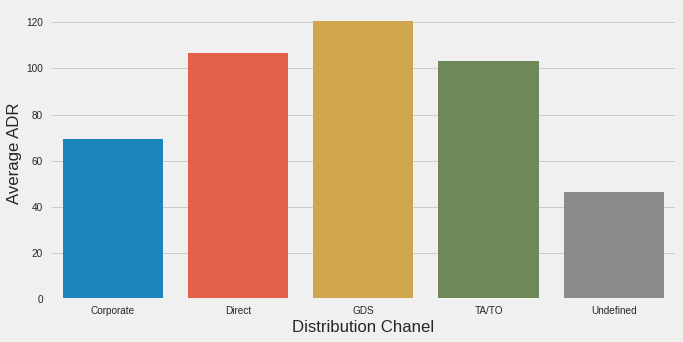

In [47]:
plt.figure(figsize=(10,5))
avg_adr_count = groupby_dc["adr"].mean().reset_index().rename(columns = {"adr":"avg_adr"})
sns.barplot(x = avg_adr_count["distribution_channel"],y = avg_adr_count["avg_adr"])
plt.xlabel("Distribution Chanel")
plt.ylabel("Average ADR")
plt.show()

* Average ADR is high for GDS type of distribution chanel.

In [48]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'all_night', 'kids',
       'num_customers'],
      dtype='object')

## What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

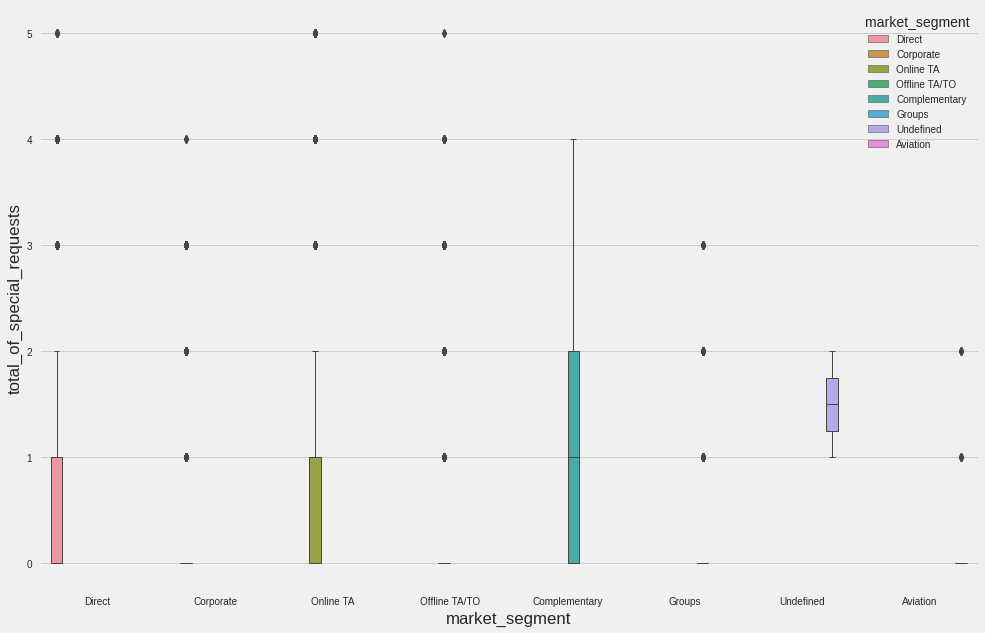

In [49]:
sns.boxplot(x= "market_segment",y = "total_of_special_requests",hue = "market_segment",data = df,linewidth =1)
fig= plt.gcf()
fig.set_size_inches(15,10)

plt.show()

* For almost every market segment hotels are getting exceptionally high requests.

### Special Request analysis

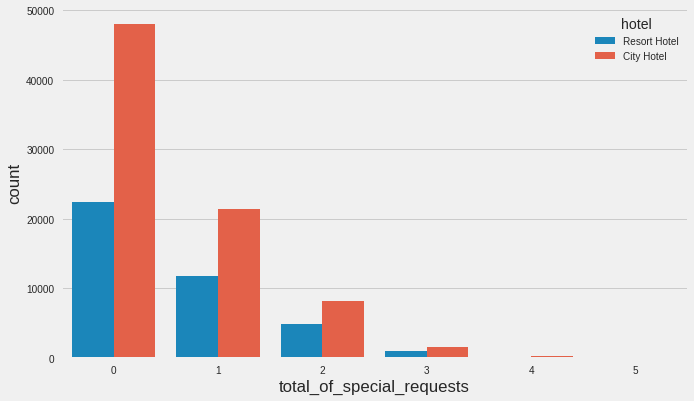

In [50]:
sns.countplot(x="total_of_special_requests",hue ="hotel",data = df,linewidth= 1)
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

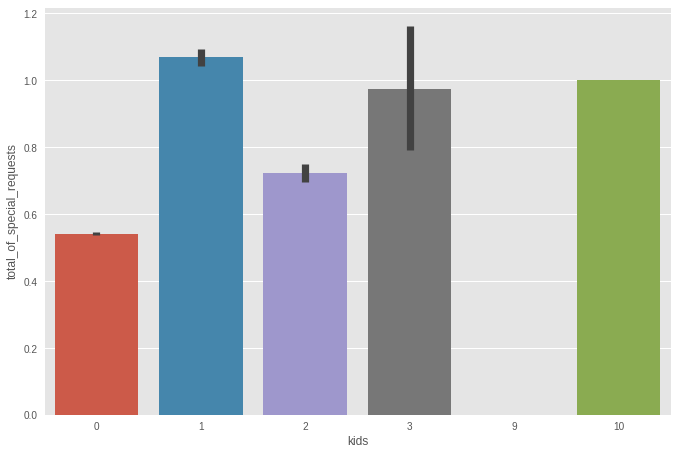

In [51]:
plt.style.use('ggplot')
sns.barplot(x="kids",y="total_of_special_requests",data = df,linewidth= 1)
fig= plt.gcf()
fig.set_size_inches(10,7)
plt.show()

* The number of special request is high if the customers have kids with number one, two, three and ten.

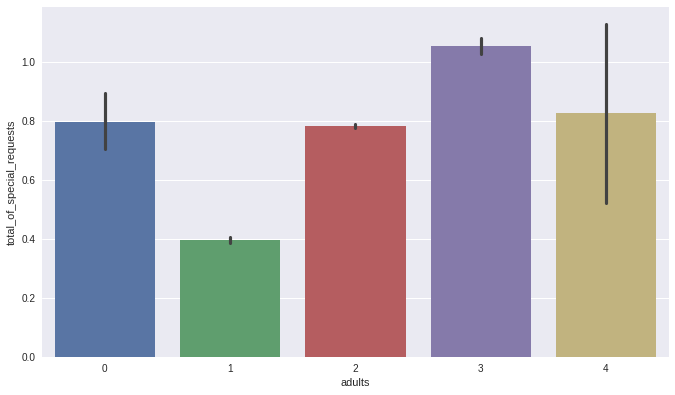

In [52]:
plt.style.use('seaborn')
sns.barplot(x="adults",y="total_of_special_requests",data = df_not_canceled,linewidth= 1)
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

* Customers who are booking the hotel for two,three or four people the special request is high.
* Special request number is low when the customers are booking hotels for only one people.

* Average special request is high when the number of adult customer is in the range of 2 to 4

## Stay in hotel nights analysis.

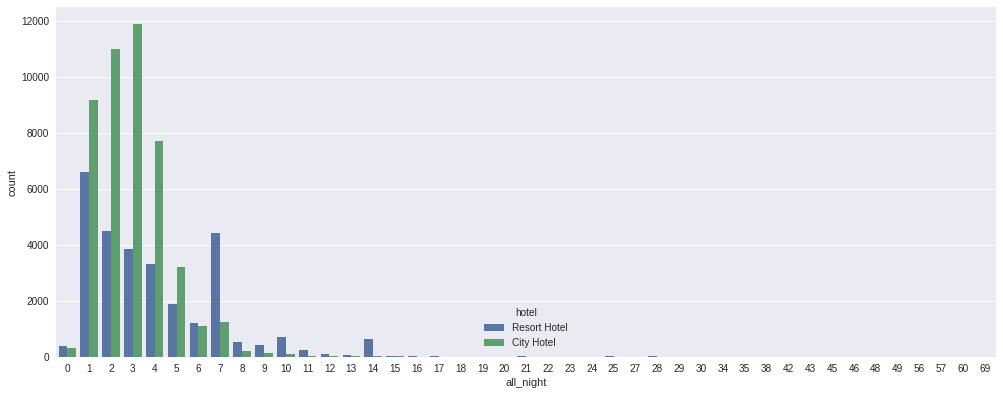

In [53]:
sns.countplot(x="all_night",hue="hotel",data = df_not_canceled)
fig= plt.gcf()
fig.set_size_inches(15,6)
plt.show()

* Maximum of customers who book City hotels prefers staying 1 to 4 days range.
* Maximum of customers who book Resort hotels prefers staying 1 to 7 days range
but mostly in one, two or three days.


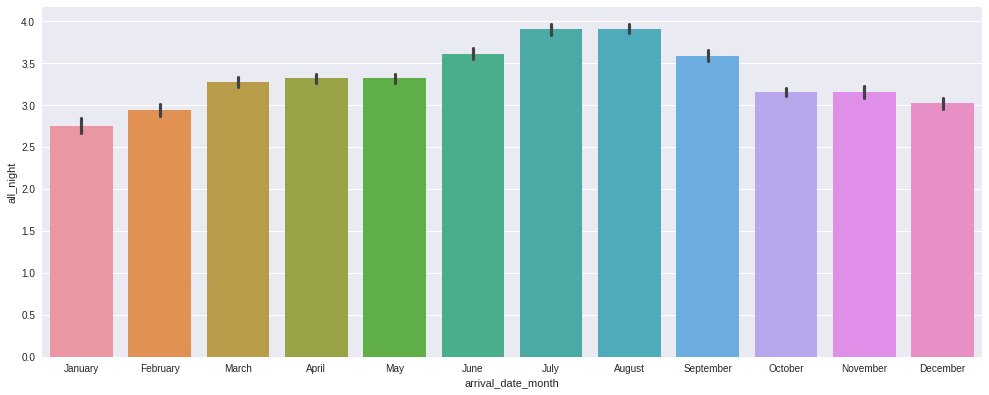

In [54]:
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

sns.barplot(y="all_night",x="arrival_date_month",order=month_order,data = df_not_canceled)
fig= plt.gcf()
fig.set_size_inches(15,6)
plt.show()

* Staying at night is high in July and August months compared to rest of the months.

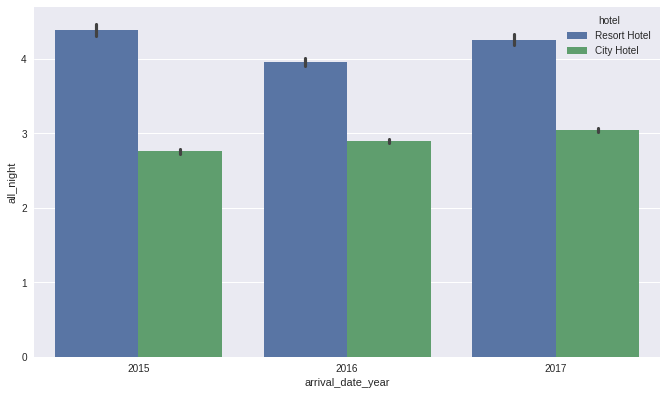

In [55]:
sns.barplot(y="all_night",x="arrival_date_year",hue = "hotel",data = df_not_canceled)
fig= plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Hotel Cancellation analysis

In [56]:
df_is_canceled = df[(df["is_canceled"]==1)]
defined_chanel = df[df["distribution_channel"] != "Undefined"]
defined_chanel["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


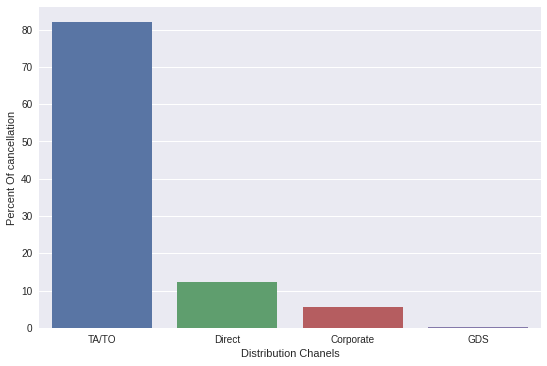

In [57]:
distribution_channel_values, pct_distribution_channel_value = get_count(defined_chanel["distribution_channel"])
sns.barplot(distribution_channel_values, pct_distribution_channel_value)
plt.xlabel("Distribution Chanels")
plt.ylabel("Percent Of cancellation")
plt.show()

* Most of the cancellation were done from the chanel of TA/TO

* Cancellation of request in varrying lead time and waiting days.

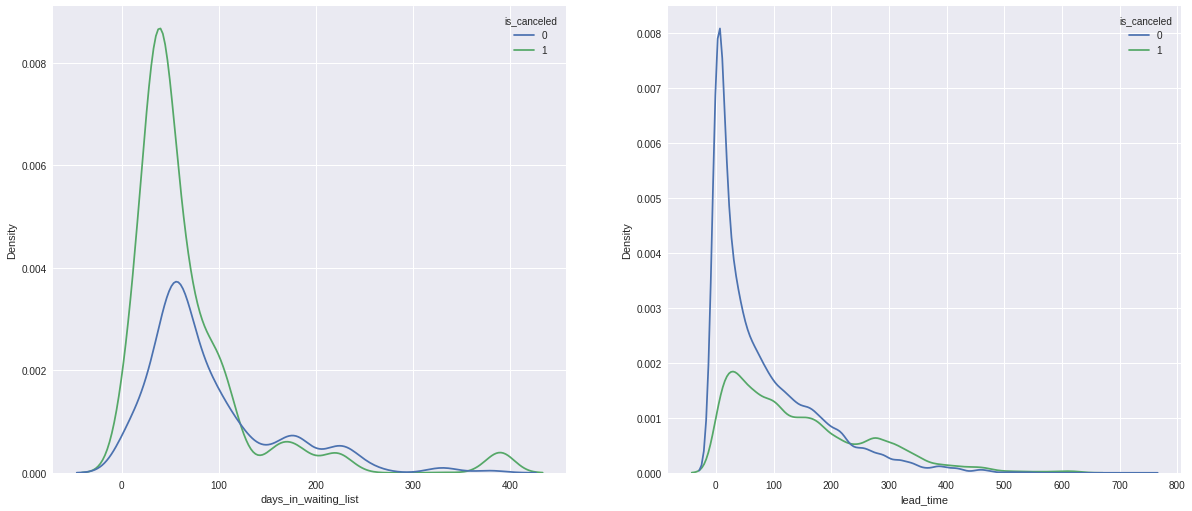

In [58]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

* We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. 
* Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.




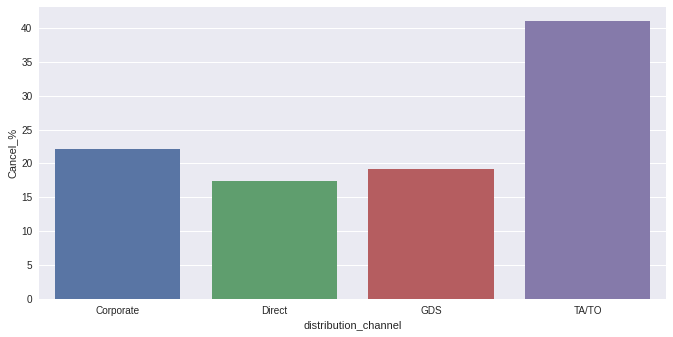

In [59]:
d1 = pd.DataFrame((groupby_dc['is_canceled'].sum()/groupby_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


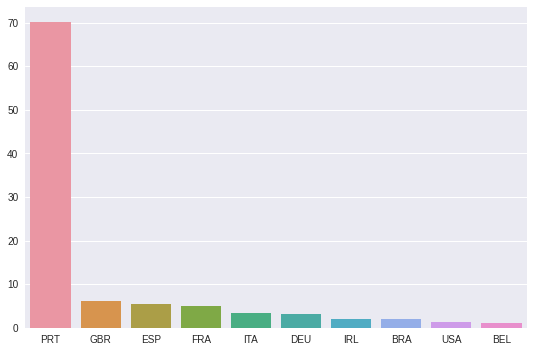

In [60]:
country_wise_cancel,pct_country_wise_cancel = get_count(df_is_canceled["country"],limit = 10)
sns.barplot(country_wise_cancel,pct_country_wise_cancel)
plt.show()

## The optimal length of stay in order to get the best daily rate?

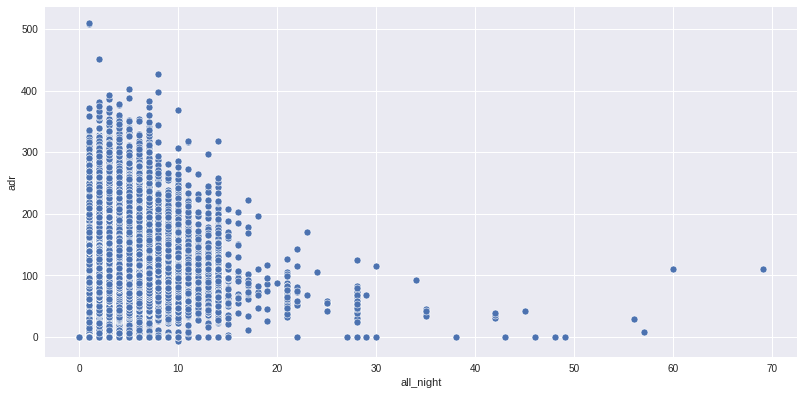

In [61]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'all_night', data = df_not_canceled)
plt.show()

* When the stay in nights at hotels are more than 20 days then customers can get optimal rate for booking. 

## Demand for car parking space in different kind of hotels and comparison in rates.

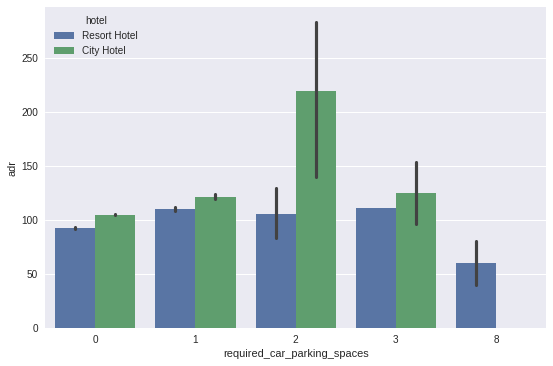

In [62]:
sns.barplot(y = "adr",x= "required_car_parking_spaces",hue = "hotel",data = df)
plt.show()

* When the required car parking space is 2 the demand is most.
* Also the adr is high in case when car parking space is 2.
* The ADR is higher in City Hotels than Resort hotels. 

## Different customer type E.g. Single,Couple,Family and their hotel demand.

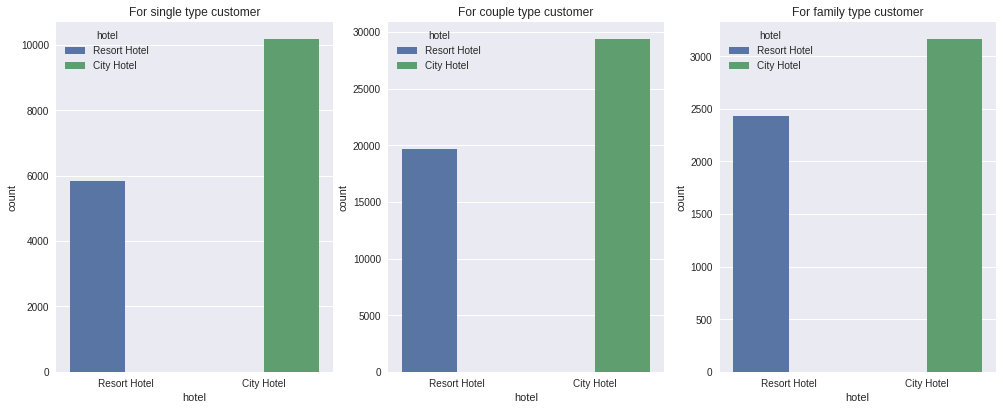

In [63]:
single = df_not_canceled[(df_not_canceled['adults'] == 1) & (df_not_canceled["kids"] == 0)]
couple = df_not_canceled[(df_not_canceled['adults'] == 2) & (df_not_canceled["kids"] == 0)]
family = df_not_canceled[(df_not_canceled['adults'] >= 2) & (df_not_canceled["kids"] >= 1)]

fig,axes = plt.subplots(1,3,figsize =(15,6))
sns.countplot(ax = axes[0],x="hotel",hue="hotel",data = single)
sns.countplot(ax = axes[1],x="hotel",hue="hotel",data = couple)
sns.countplot(ax = axes[2],x="hotel",hue="hotel",data = family)
axes[0].set_title("For single type customer")
axes[1].set_title("For couple type customer")
axes[2].set_title("For family type customer")

plt.show()

## Different customer type E.g. Single,Couple,Family and their number of arrival in various months.

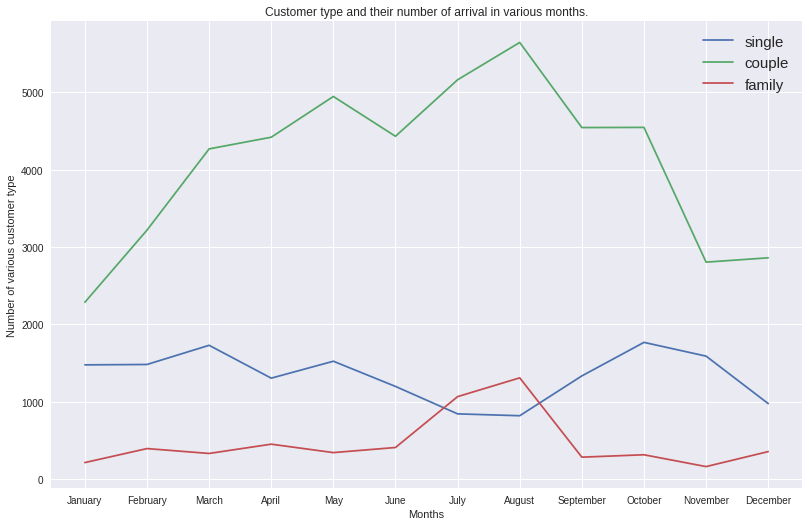

In [64]:

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  df = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=df, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
plt.title("Customer type and their number of arrival in various months.") 
plt.xlabel("Months") 
plt.ylabel("Number of various customer type")
plt.grid(True)
plt.legend(fontsize = 15)
plt.show()

* Couple type customers(2 adults) are booking the hotels in most number. They are prefering July and August months.
* Single type customers are prefering March, October months mostly.
* Family type customers(equal or more than 2 adults with equal or more than one kid) are prefering moslty July and August months.